Numpy assignment - Tasmanian devil

## Step 3: Choose and load image


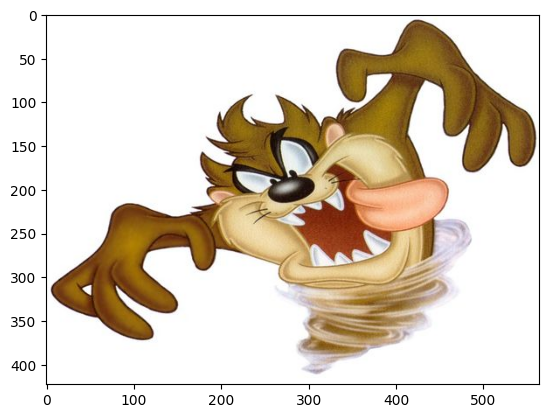

In [75]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

loc_input_img = os.path.join('..', 'data', 'input', 'tasmanian_devil.jpeg')
img = Image.open(loc_input_img)
tasman_devil = np.array(img)

plt.imshow(tasman_devil)
plt.show()

## Step 4: Do my image manipulations

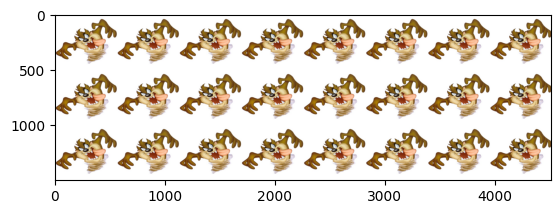

In [63]:
# Visualize 3 by 8
tasman_3_by_8 = np.tile(tasman_devil, (3, 8, 1))
plt.imshow(tasman_3_by_8) 
plt.show()

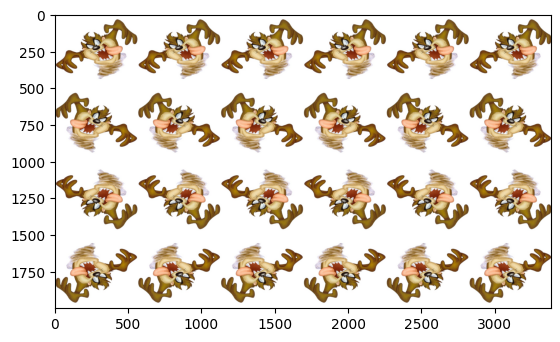

In [64]:
# Visualize 6 by 4 - flipping horizontal & vertical

# create row of 6 x original devil
tasman_6_original = np.tile(tasman_devil, (1, 6, 1))

# create row of 6x horizontally flipped devil
tasman_flipped_lr = tasman_devil[:, ::-1, :]
tasman_6_flipped_lr = np.tile(tasman_flipped_lr, (1, 6, 1))

# create row of 6x upside down original devil
tasman_upside_down = tasman_devil[::-1, :, :]
tasman_6_upside_down = np.tile(tasman_upside_down, (1, 6, 1))

# create row of 6x flipped horizontally upside down original devil
tasman_flipped_upside_down = tasman_devil[::-1, ::-1, :]
tasman_6_flipped_upside_down = np.tile(tasman_flipped_upside_down, (1, 6, 1))

# stack rows & show image
tasman_stacked = np.vstack([tasman_6_original, tasman_6_flipped_lr, tasman_6_upside_down, tasman_6_flipped_upside_down])
plt.imshow(tasman_stacked) 
plt.show()


(2000, 2256, 3)


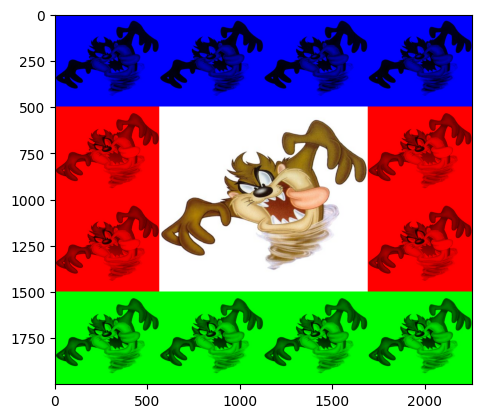

In [65]:
# Matrix wil colourfull tiles

# Create red devil
red_devil = tasman_devil.copy()
red_devil[:,:,[1,2]] = 0

# Create blue devil
blue_devil = tasman_devil.copy()
blue_devil[:,:,[0,1]] = 0

# Create green devil
green_devil = tasman_devil.copy()
green_devil[:,:,[0,2]] = 0

# Create row of 4 x blue devil
tasman_4_blue = np.tile(blue_devil, (1, 4, 1))

# Create column of 2 x red devil
tasman_2_red = np.tile(red_devil, (2, 1, 1))

# Create row of 4 x green devil
tasman_4_green = np.tile(green_devil, (1, 4, 1))

# Create 2x sized devil
double_devil = np.repeat(np.repeat(tasman_devil, 2, axis=0), 2, axis=1)

# Create middle section of final picture
tasman_red_and_2xsized = np.hstack([tasman_2_red, double_devil, tasman_2_red])

# Stack blue, red plus 2x sized and green rows
final_picture = np.vstack([tasman_4_blue, tasman_red_and_2xsized, tasman_4_green])

print(np.shape(final_picture))

plt.imshow(final_picture) 
plt.show()

### Step 5: Generalize these manipulations
- Define a function 'grid_with_flips(image, matrix)', where 'matrix' is a matrix containing the type of flips that you do with your image. 
You could say 0 for you image not flipped, '1' for flipping your image left right, '2' for flipping it upside down and '3' for flipping it both left right and upside down. 
For example the two images you created in Step 4 would be the result of using the matrix: [[1 for i in range(7)] for j in range(3)] and [[j for i in range(7)] for i in range(3)]

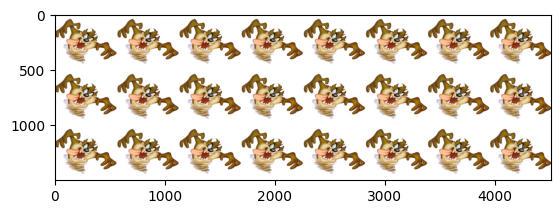

In [66]:
def flip_image(my_image, flip_type=0):
    """ function that flips an image:
    flip_type:
       (0) image is not flipped
       (1) image is flipped over the first axis - returning a vertically flipped image
       (2) image is flipped over the second axis - returning a horizontally flipped image
       (3) image is flipped over both the first and the second axis - returning a vertically and horizontally flipped image
    """
    my_flipped_image = np.copy(my_image)
    if flip_type == 1:
        my_flipped_image = my_flipped_image[:,::-1,:]
    elif flip_type == 2:
        my_flipped_image = my_flipped_image[::-1,:,:]
    elif flip_type == 3:
        my_flipped_image = my_flipped_image[::-1,::-1,:]
    else:
        my_flipped_image = my_flipped_image
    return my_flipped_image

def grid_with_flips(my_image, flip_matrix):
    """ function that takes an image and an array with flip parameters and returns one big image """
    rows, cols = np.shape(flip_matrix)
    height, width, _ = my_image.shape
    grid_height = rows * height
    grid_width = cols * width
    grid = np.zeros((grid_height, grid_width, 3), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            start_row, end_row = i*height, (i+1)*height
            start_col, end_col = j*width, (j+1)*width
            flip_img = flip_image(my_image, flip_matrix[i][j])
            grid[start_row:end_row, start_col:end_col] = flip_img
    return grid

# Define the flip matrix for the first image manipulation
my_flip_matrix = [[1 for i in range(8)] for j in range(3)]
my_flip_np_matrix = np.array(my_flip_matrix)

# Get the grid image with flips
my_grid_image = grid_with_flips(tasman_devil, my_flip_np_matrix)

# Display the grid image
plt.imshow(my_grid_image)
plt.show()


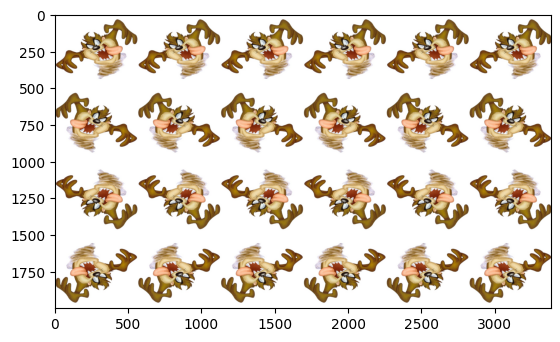

In [67]:
# Define the flip matrix for the second image manipulation
my_second_flip_matrix = [[j for i in range(6)] for j in range(4)]

# Get the grid image with flips
my_second_grid_image = grid_with_flips(tasman_devil, my_second_flip_matrix)

# Display the grid image
plt.imshow(my_second_grid_image)
plt.show()

#### Define a function create_colorful_big_one(colors) where colors is a list of colors (starting left top and rotating clockwise). The image from Step 4 is the result of calling the function create_colorful_big_one(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r']).

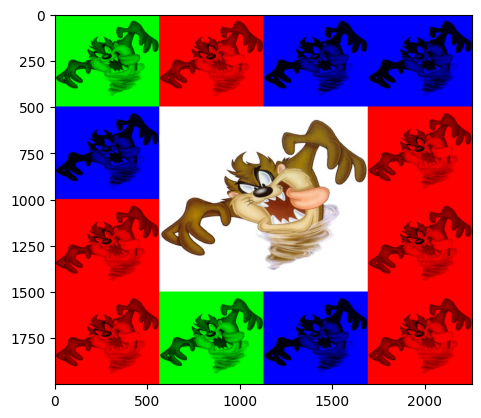

In [68]:
def color_image(image, color):
    my_new_image = np.copy(image)
    if color == "r":
        my_new_image[:,:,[1,2]] = 0
    elif color == "g":
        my_new_image[:,:,[0,2]] = 0
    elif color == "b":
        my_new_image[:,:,[0,1]] = 0
    else:
        return my_new_image
    return my_new_image

def create_colorful_big_one(colors):
    # Fetch width & height of original image
    image_height, image_width, _ = np.shape(tasman_devil)  # Corrected height and width
    
    # Create a new blank image with the specified size and white background
    output_img = np.empty((4 * image_height, 4 * image_width, 3), dtype=np.uint8)  # Corrected height and width
    
    # Big center image
    tasman_devil_doubled = np.array(Image.fromarray(tasman_devil).resize((image_width * 2, image_height * 2)))  # Corrected height and width
    
    # Identify positions and order them clockwise
    positions = [(0, 0),               # 1st image on first row
        (0, image_width),    # 2nd image on first row
        (0, 2 * image_width),  # 3rd image on first row
        (0, 3 * image_width),   # 4th image on first row
        (image_height, 3 * image_width), # last (3rd) image on second row
        (2 * image_height, 3 * image_width), # last (3rd) image on third row
        (3 * image_height, 3 * image_width), # 4th image on fourth row
        (3 * image_height, 2 * image_width), # 3rd image on fourth row
        (3 * image_height, image_width),  # 2nd image on fourth row
        (3 * image_height, 0), # 1st image on fourth row
        (2 * image_height, 0), # 1st image on third row
        (image_height, 0),     # 1st image on second row
        (image_height, image_width)]  ## big center image
    
    # Paste colored images on the correct positions in sequence
    for i, color in enumerate(colors):
        position = positions[i]
        # Create a colored version of the image based on the specified color
        colored_image = color_image(tasman_devil, color)
        # Paste the resized colored image onto the output_img
        output_img[position[0]:position[0]+image_height, position[1]:position[1]+image_width] = colored_image
    
    # Paste big image
    position = positions[12]
    output_img[position[0]:position[0]+image_height*2, position[1]:position[1]+image_width*2] = tasman_devil_doubled
    
    return output_img

result_image = create_colorful_big_one(['g', 'r', 'b', 'b', 'r', 'r', 'r', 'b', 'g', 'r', 'r', 'b'])

plt.imshow(result_image)
plt.show()


### Step 6: Your own manipulations Choose 2 more ways in which you manipulate your image and implement them.

(600, 600, 3)
(600, 600, 3)


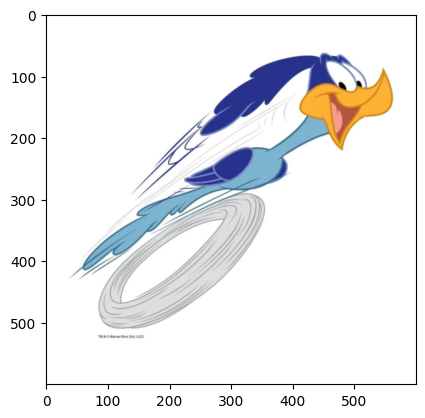

In [85]:
# Resize Tamsmanian devil
new_tasman_devil = np.pad(tasman_devil, ((80, 97), (18, 18), (0, 0)), mode='constant', constant_values=255)

print(new_tasman_devil.shape)

loc_input_img = os.path.join('..', 'data', 'input', 'road_runner.jpeg')
img = Image.open(loc_input_img)
img = img.resize((600, 600), Image.BILINEAR)
road_runner = np.array(img)

print(road_runner.shape)

plt.imshow(road_runner)
plt.show()

(600, 600, 3)
(600, 600, 3)


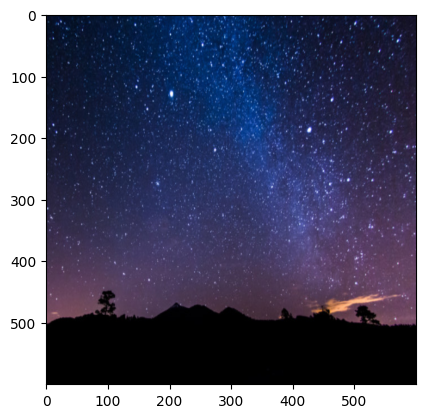

In [95]:
# Resize Tamsmanian devil
new_tasman_devil = np.pad(tasman_devil, ((80, 97), (18, 18), (0, 0)), mode='constant', constant_values=255)

print(new_tasman_devil.shape)

loc_input_img = os.path.join('..', 'data', 'input', 'stars.jpg')
img = Image.open(loc_input_img)
img = img.resize((600, 600), Image.BILINEAR)
stars = np.array(img)

print(stars.shape)

plt.imshow(stars)
plt.show()

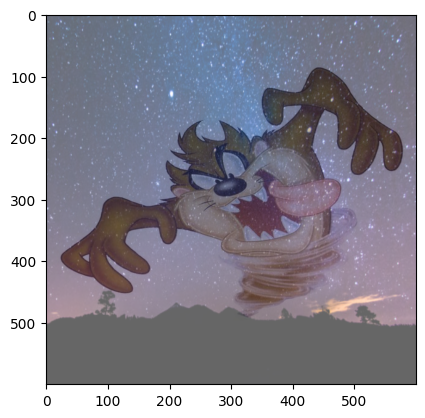

In [102]:
def blend_images(image1, image2, alpha):
    image1 = image1.astype(float)
    image2 = image2.astype(float)
    blended_image = alpha * image1 + (1 - alpha) * image2
    
    # Ensure values are within the valid range [0, 255]
    blended_image = np.clip(blended_image, 0, 255)

    # Convert back to uint8 data type
    blended_image = blended_image.astype(np.uint8)
    return blended_image

road_devil = blend_images(new_tasman_devil, stars, 0.4)

plt.imshow(road_devil)
plt.show()